<a href="https://colab.research.google.com/github/csr911/BPNN/blob/main/BPNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement a BPNN

11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2915 - accuracy: 0.9121 - val_loss: 0.1404 - val_accuracy: 0.9581
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1194 - accuracy: 0.9639 - val_loss: 0.1024 - val_accuracy: 0.9670
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0836 - accuracy: 0.9748 - val_loss: 0.0994 - val_accuracy: 0.9698
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9799 - val_loss: 0.0914 - val_accuracy: 0.9726
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0494 - accuracy: 0.9848 - val_loss: 0.0812 - val_accuracy: 0.9744
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0403 - accuracy: 0.9869 - val_loss: 0.0791 - val_accuracy: 0.9768
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0334 - accuracy: 0.9888 - val_loss: 0.0676 - val_accuracy

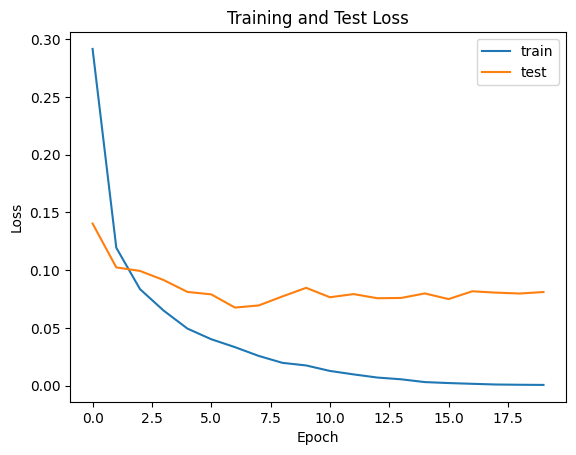

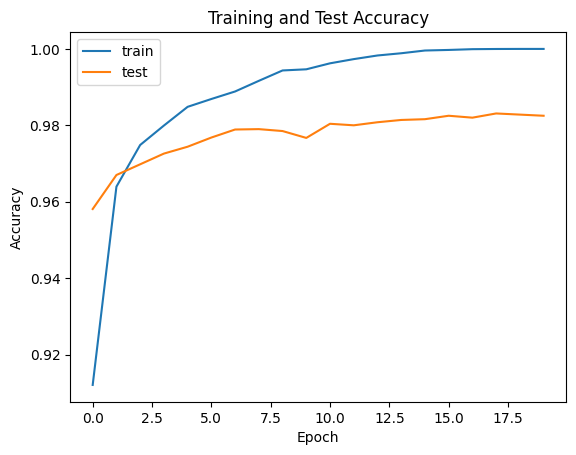

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Define the architecture of the BPNN
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model with the loss function, optimizer, and metric
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train the model on the MNIST training set, and evaluate it on the test set
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# Plot the training loss and accuracy
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


This code loads the MNIST dataset using the mnist.load_data() function, and preprocesses the data by reshaping the images to 1D vectors and normalizing the pixel values to be between 0 and 1. The labels are one-hot encoded using np.eye(10).

We define the architecture of the BPNN using the Keras Sequential API, with two hidden layers of 128 and 64 neurons, respectively, and ReLU activation functions. The output layer has 10 neurons and a softmax activation function. We then compile the model with the categorical cross-entropy loss function, the SGD optimizer with a learning rate of 0.01 and momentum of 0.9, and the accuracy metric.

We train the model on the MNIST training set for 20 epochs with a batch size of 32, and evaluate it on the test set. We also record the training history in the history variable.

Finally, we generate two plots using matplotlib to visualize the training process: one for the training and test loss, and one for the training and test accuracy.